### ALS factors sanity check

https://github.schibsted.io/spt-analytics/recsys-als-calculator/

 * 3498674 user clicks for interval 2015-12-13/2016-01-12
 * Trained als model for 154443 x 42069 x 20 user/item factors
 * Then exported only factors for the 1000 most popular items


    "aftenposten": {
      "8bbeb560-b5ef-11e4-9371-231becfad413": {
        "alpha": 30,
        "iteration": 30,
        "lambda": 0.001,
        "precision": 1,
        "rank": 20,
        "timeslot": 43200
      }

In [27]:
import pandas as pd

!cat /Users/gui/Data/models/als-ap-users.csv | sed 's/[^0-9|E|,|.|-]*//g' > /Users/gui/Data/models/als-ap-users-csv.csv
user_factors = pd.read_csv("/Users/gui/Data/models/als-ap-users-csv.csv", header=None, index_col=0)
user_factors.index.name = 'user'

print(user_factors.shape)

user_factors.head()

(154443, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
user,,,,,,,,,,,,,,,,,,,,
6295438,-0.572994,-0.056119,-0.298238,-0.179101,0.080341,0.028227,-0.838404,-0.052362,0.774406,-1.416896,-0.112467,-0.097689,1.162289,0.124712,0.572276,1.528217,-0.796413,-0.951078,-0.058082,-0.500283
2104234,-0.580087,-0.061557,-0.292646,-0.185582,0.089087,0.067786,-0.864654,-0.066935,0.754022,-1.434561,-0.110032,-0.095244,1.101824,0.091961,0.606235,1.554094,-0.788844,-0.938605,-0.073570,-0.490010
4596725,-0.595548,-0.093866,-0.299639,-0.183490,0.105981,0.046947,-0.841016,-0.077786,0.775004,-1.453760,-0.100553,-0.035645,1.159146,0.078837,0.566885,1.518600,-0.790607,-0.922692,-0.050182,-0.443427
1304043,-0.600589,-0.026823,-0.277373,-0.197913,0.058870,0.017129,-0.808799,-0.078392,0.784872,-1.424963,-0.069954,-0.078442,1.163987,0.134183,0.543508,1.529001,-0.787277,-0.967068,-0.071398,-0.505352
2479118,-0.684435,-0.235596,-0.328630,-0.072862,-0.060785,0.063362,-0.691574,-0.318582,1.218721,-1.251962,-0.726101,-0.121114,1.215242,-0.184859,0.563540,1.572134,-0.245620,-1.182290,-0.147989,-0.174058


In [26]:
!cat /Users/gui/Data/models/als-ap-items.csv | sed 's/[^0-9|E|,|.|-]*//g' > /Users/gui/Data/models/als-ap-items-csv.csv

item_factors = pd.read_csv("/Users/gui/Data/models/als-ap-items-csv.csv", header=None, index_col=0)

item_factors.index.name = 'item'

print(item_factors.shape)
item_factors.head()

(261, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
item,,,,,,,,,,,,,,,,,,,,
8308017,-0.058660,-0.005909,-0.029975,-0.018629,0.010409,0.002962,-0.084959,-0.005827,0.078818,-0.145438,-0.012377,-0.009947,0.121451,0.013601,0.059018,0.157372,-0.080391,-0.099007,-0.004870,-0.052945
665133,-0.058798,-0.005221,-0.031456,-0.019771,0.008346,0.002125,-0.087366,-0.007387,0.080344,-0.143685,-0.012330,-0.011740,0.119067,0.012470,0.057905,0.157392,-0.081664,-0.100346,-0.005281,-0.052446
512296,-0.058637,-0.003167,-0.031762,-0.019054,0.008398,0.001917,-0.085793,-0.005780,0.079525,-0.145269,-0.012359,-0.010762,0.118772,0.011758,0.060595,0.158362,-0.082308,-0.097503,-0.006924,-0.052040
8289930,-0.058939,-0.005900,-0.030234,-0.017983,0.008440,0.002801,-0.085820,-0.005772,0.079493,-0.146254,-0.011617,-0.009751,0.119158,0.012436,0.059574,0.157979,-0.081881,-0.097881,-0.006831,-0.051228
8291532,-0.058578,-0.005598,-0.029218,-0.018923,0.008423,0.002226,-0.084572,-0.006128,0.080259,-0.146469,-0.011837,-0.010935,0.120190,0.012035,0.060188,0.157332,-0.082050,-0.097136,-0.005909,-0.052056


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Item factors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,-0.058853,-0.005557,-0.030276,-0.018489,0.008205,0.003022,-0.085699,-0.005585,0.079909,-0.146144,-0.011645,-0.009885,0.119772,0.012468,0.059295,0.157722,-0.081460,-0.097526,-0.006659,-0.051806
std,0.001550,0.001089,0.004442,0.001978,0.006858,0.002616,0.008036,0.001636,0.002083,0.002698,0.001939,0.004815,0.002011,0.004665,0.002950,0.001297,0.002440,0.003990,0.008911,0.003089
min,-0.075124,-0.017390,-0.033216,-0.022648,-0.100614,-0.000134,-0.090299,-0.018267,0.075695,-0.187873,-0.030742,-0.014226,0.114857,0.004922,0.057176,0.154568,-0.084555,-0.101528,-0.148670,-0.098792
25%,-0.059297,-0.005899,-0.030978,-0.018954,0.008259,0.002548,-0.086540,-0.005957,0.079448,-0.146266,-0.011918,-0.010578,0.119288,0.011874,0.058711,0.157340,-0.082016,-0.098231,-0.006501,-0.051941
50%,-0.058933,-0.005582,-0.030600,-0.018606,0.008607,0.002898,-0.086191,-0.005600,0.079747,-0.145972,-0.011610,-0.010208,0.119646,0.012220,0.059003,0.157598,-0.081691,-0.097881,-0.006146,-0.051498
75%,-0.058495,-0.005221,-0.030222,-0.018273,0.008927,0.003160,-0.085909,-0.005255,0.080101,-0.145670,-0.011285,-0.009902,0.119998,0.012506,0.059329,0.157918,-0.081357,-0.097532,-0.005734,-0.051143
max,-0.044887,-0.000736,0.039871,0.008441,0.019316,0.043725,0.043093,0.012164,0.111137,-0.142561,0.009852,0.066435,0.148090,0.086009,0.097637,0.170529,-0.050681,-0.040719,-0.001714,-0.046415


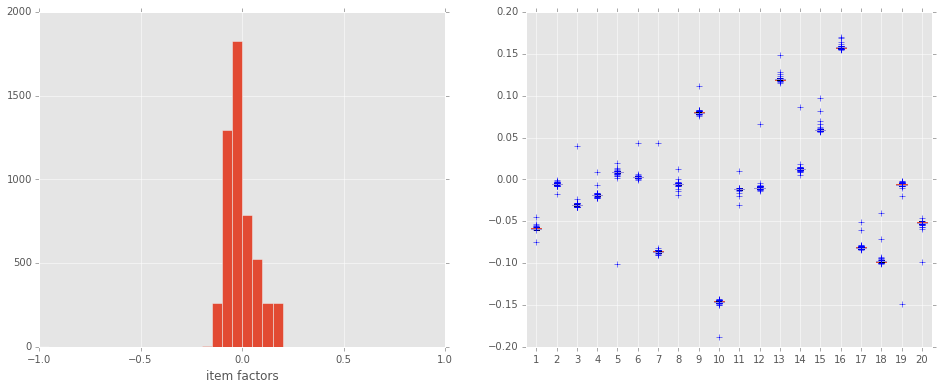

In [29]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_size_inches((16, 6))

ax1.hist(item_factors.values.ravel(), range=[-1, 1], bins=40);
ax1.set_xlabel('item factors')
item_factors.boxplot(ax=ax2, return_type='axes');
#plt.yscale('log')

item_factors.describe()

## User factors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000,154443.000000
mean,-0.545931,-0.038804,-0.282813,-0.171728,0.081203,0.024663,-0.790003,-0.050667,0.734068,-1.340079,-0.108008,-0.095912,1.089765,0.112393,0.546293,1.450949,-0.742709,-0.894744,-0.052010,-0.489821
std,0.142975,0.103347,0.091605,0.079451,0.097409,0.070858,0.192160,0.074357,0.176461,0.308776,0.076185,0.076843,0.262733,0.076072,0.137621,0.327904,0.187778,0.215406,0.078572,0.143148
min,-1.896990,-1.480750,-1.510974,-1.297160,-1.262580,-0.976803,-2.041633,-1.188684,-0.670813,-2.540990,-1.270432,-1.085600,-0.724359,-0.991442,-0.789871,-0.616035,-1.957703,-1.769631,-0.930227,-1.410839
25%,-0.575427,-0.056414,-0.300816,-0.183531,0.078854,0.022744,-0.839497,-0.057656,0.770195,-1.420219,-0.116289,-0.103593,1.151216,0.113659,0.569364,1.527278,-0.795248,-0.952634,-0.062904,-0.507639
50%,-0.571901,-0.053324,-0.297467,-0.179978,0.083745,0.027915,-0.836500,-0.053746,0.774546,-1.417296,-0.113033,-0.099319,1.160640,0.118067,0.572944,1.530548,-0.792775,-0.950132,-0.059416,-0.500972
75%,-0.567104,-0.048019,-0.293026,-0.176096,0.087143,0.030969,-0.830737,-0.049820,0.777366,-1.412867,-0.109590,-0.096092,1.163233,0.121602,0.576886,1.533616,-0.783049,-0.942116,-0.054519,-0.497632
max,0.723815,0.969306,0.861082,0.879020,1.066949,1.098339,0.665642,1.058785,1.883869,0.656841,1.092552,1.343830,2.082713,1.046491,1.325301,2.476238,0.785749,0.744739,1.240444,0.754091


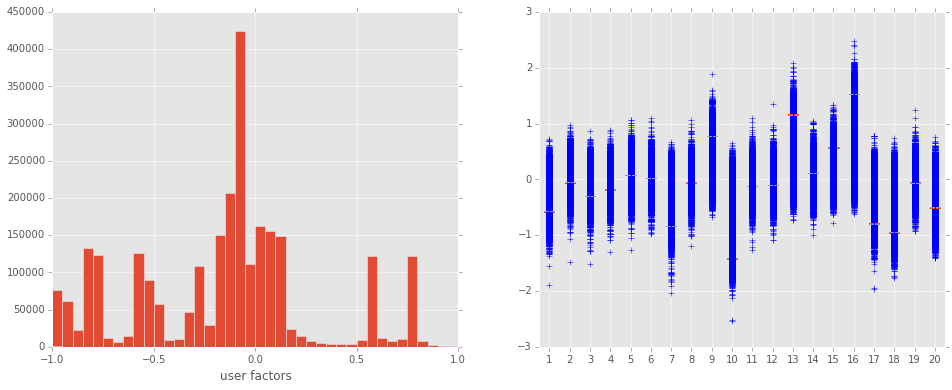

In [31]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_size_inches((16, 6))

ax1.hist(user_factors.values.ravel(), range=[-1, 1], bins=40);
ax1.set_xlabel('user factors')
user_factors.boxplot(ax=ax2, return_type='axes');

user_factors.describe()

## Item factors with the higher variance (minus outliers)

In [40]:
import numpy as np

item_factors.describe().loc['std'].sort_values(ascending=False).head(5)

19    0.008911
7     0.008036
5     0.006858
12    0.004815
14    0.004665
Name: std, dtype: float64

In [84]:
user_factors.describe().loc['std'].sort_values(ascending=False).head(5)

16    0.327904
10    0.308776
13    0.262733
18    0.215406
7     0.192160
Name: std, dtype: float64

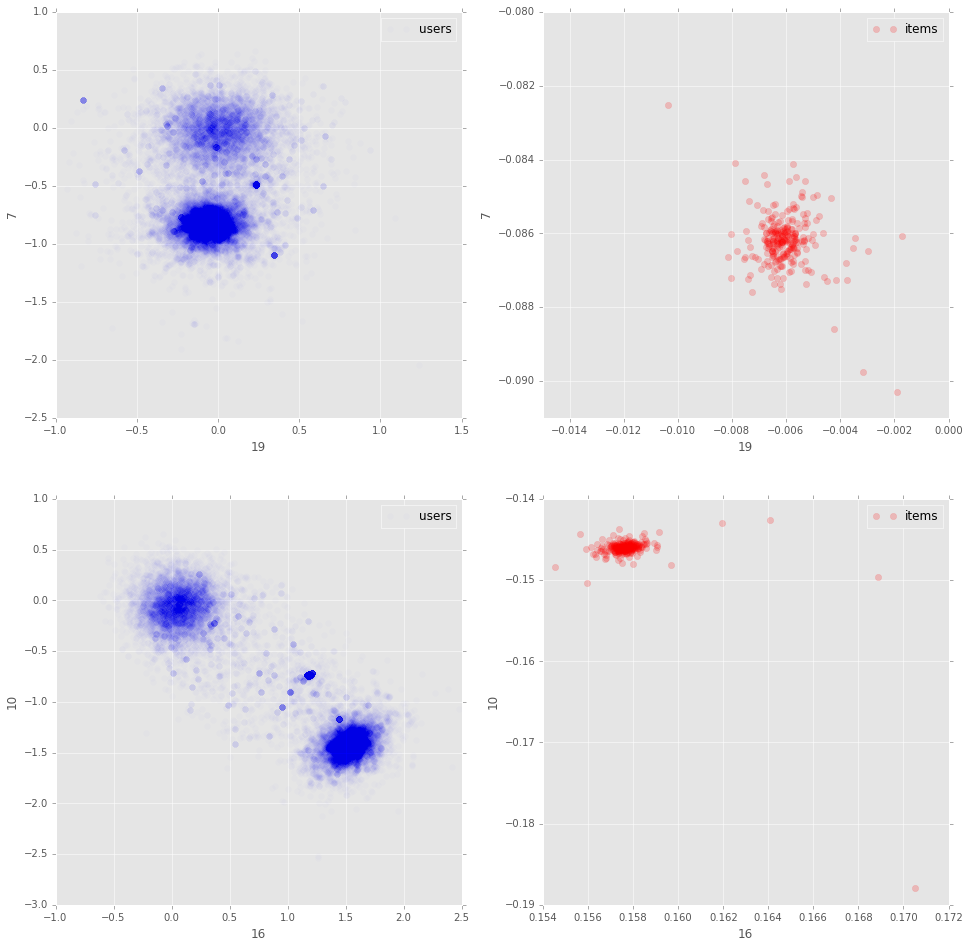

In [93]:
factor1, factor2 = 19, 7

def bi_plot(ax, factor1, factor2, user=False):
    if user:
        ax.plot(user_factors[factor1], user_factors[factor2], 'bo', markeredgecolor='blue', alpha=.01, label='users')
    else:
        ax.plot(item_factors[factor1], item_factors[factor2], 'ro', markeredgecolor='red', alpha=.2, label='items');
    ax.set_xlabel(factor1)
    ax.set_ylabel(factor2)
    ax.legend();
    
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
f.set_size_inches((16, 16))

bi_plot(ax1, factor1, factor2, user=True)
bi_plot(ax2, factor1, factor2, user=False)
ax2.set_xlim([-0.015, 0.])
ax2.set_ylim([-0.091, -0.08])

factor1, factor2 = 16, 10
bi_plot(ax3, factor1, factor2, user=True)
bi_plot(ax4, factor1, factor2, user=False)


## Distribution of scores and item frequencies in top 1 position 

In [59]:
import sys
sys.path += ['../']

,#top1
item,
658218,5555
8283560,717
8288751,604
8311587,554
6692421,528
8304923,457
665693,396
668396,330
8307164,210


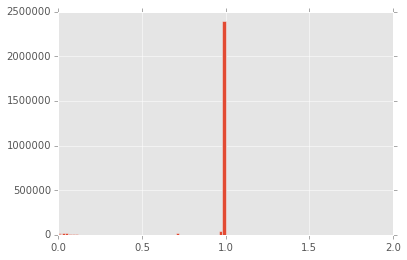

In [75]:
from recs.models.history import per_user_topn_indexes

user_item_scores = np.dot(user_factors.values[:10000, :], item_factors.values.T)

plt.hist(user_item_scores.ravel(), bins=100, range=[0, 2])
plt.xlim([0, 2])
user_topn_items = per_user_topn_indexes(user_item_scores, topn=1)

from collections import Counter
item_index_counts = Counter(user_topn_items.ravel())

pd.DataFrame.from_records(
    [{'item': item_factors.index[item_index], '#top1':count} 
     for item_index, count in item_index_counts.iteritems()], index='item').sort_values('#top1', ascending=False).head(10)